In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
import torch
from skimage import data, exposure

x shape: torch.Size([32768, 32, 32, 3])


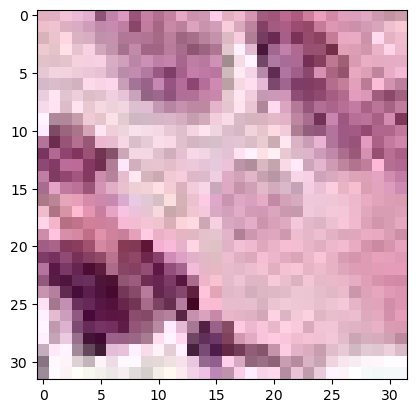

In [3]:
# Load tensor
x = torch.load("/home/p3_medimg/Project/dataset/pcam_HOG/test_x.pt")

print("x shape:", x.shape)
# If the image is CHW (channels, height, width), convert to HWC
img = x[1]  # Get the first image

# Convert to numpy
img = img.numpy().astype(int)

# Show
plt.imshow(img)
plt.show()

HOG feature descriptor shape: (72,)
HOG image shape: (32, 32)


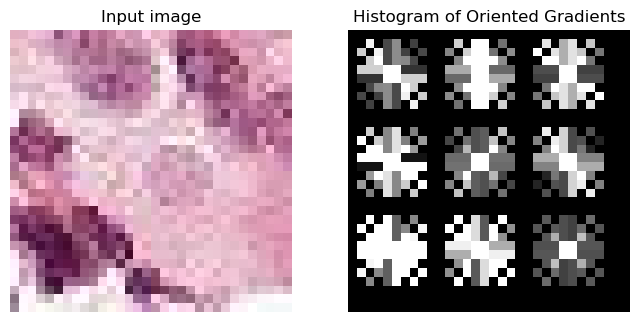

In [19]:
fd, hog_image = hog(
    img,
    orientations=8,
    pixels_per_cell=(10, 10),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)
print("HOG feature descriptor shape:", fd.shape)
print("HOG image shape:", hog_image.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()